# Problem Statement (example)

## The company has collected regional sales data across multiple products, customers, and time periods. While the dataset contains valuable information on revenue, costs, profit, regions, and customer activity, this information has not yet been fully analyzed to guide strategic decisions.

Management needs to understand:

Which regions and products contribute most to revenue and profit.

Where sales performance is lagging and why.

How customer behavior (frequency, recency, spending) impacts overall revenue.

Whether marketing efforts (e.g., promotions, discounts) are improving sales or reducing margins.

What the revenue trend looks like over time, and what can be expected in the future.

Therefore, the core problem is:
### 👉 “How can the company leverage regional sales data to identify growth opportunities, optimize resource allocation, improve profitability, and make data-driven strategic decisions?”


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_excel(r"C:\Users\BAB AL SAFA\Downloads\Sales-Analysis-main\Sales-Analysis-main\Regional Sales Dataset.xlsx")
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Profit
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,13170.257
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,24598.782
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,5184.460
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,15339.248
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,17070.930


In [3]:
df

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Profit
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,13170.257
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,24598.782
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,5184.460
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,15339.248
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,17070.930
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,74,Wholesale,USD,AXW291,825,26,12,1815.7,21788.4,980.478,20807.922
64100,SO - 0007706,2018-02-28,51,Export,USD,NXH382,444,21,6,864.3,5185.8,579.081,4606.719
64101,SO - 0007718,2018-02-28,136,Distributor,USD,AXW291,312,13,11,3953.0,43483.0,2648.510,40834.490
64102,SO - 0008084,2018-02-28,158,Distributor,USD,AXW291,737,20,7,3959.7,27717.9,2930.178,24787.722


In [22]:
# lets rename the columns to something we can understand

df.rename(columns={'Delivery Region Index' : 'Region', 'Line Total' : 'Revenue','Product Description Index':'Product Index'} ,inplace=True )
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Region,Product Index,Order Quantity,Unit Price,Revenue,Total Unit Cost,Profit
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,13170.257
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,24598.782
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,5184.460
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,15339.248
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,17070.930


In [5]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   OrderNumber          64104 non-null  object        
 1   OrderDate            64104 non-null  datetime64[ns]
 2   Customer Name Index  64104 non-null  int64         
 3   Channel              64104 non-null  object        
 4   Currency Code        64104 non-null  object        
 5   Warehouse Code       64104 non-null  object        
 6   Region               64104 non-null  int64         
 7   Product Index        64104 non-null  int64         
 8   Order Quantity       64104 non-null  int64         
 9   Unit Price           64104 non-null  float64       
 10  Revenue              64104 non-null  float64       
 11  Total Unit Cost      64104 non-null  float64       
 12  Profit               64104 non-null  float64       
dtypes: datetime64[ns](1), float64(4

None

In [23]:
# lets create a growth index which is profit/revenue
df['Growth index'] = df['Profit']/df['Revenue']
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Region,Product Index,Order Quantity,Unit Price,Revenue,Total Unit Cost,Profit,Growth index
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,13170.257,0.878333
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,24598.782,0.950909
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,5184.460,0.883333
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,15339.248,0.937143
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,17070.930,0.931250


In [24]:
# now lets create a margin index where we can measure the expected profit by substracting total unit cost from unit price and dividing it by total unit cost
df['Margin index%'] = ((df['Unit Price'] - df['Total Unit Cost'])/(df['Total Unit Cost']))*100
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Region,Product Index,Order Quantity,Unit Price,Revenue,Total Unit Cost,Profit,Growth index,Margin index%
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,13170.257,0.878333,36.986301
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,24598.782,0.950909,85.185185
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,5184.460,0.883333,42.857143
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,15339.248,0.937143,127.272727
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,17070.930,0.931250,81.818182


In [8]:
df.describe()

,OrderDate,Customer Name Index,Region,Product Index,Order Quantity,Unit Price,Revenue,Total Unit Cost,Profit,Growth index,Margin index%
count,64104,64104.000000,64104.000000,64104.000000,64104.000000,64104.000000,64104.000000,64104.000000,64104.000000,64104.000000,64104.000000
mean,2016-01-29 01:28:20.935979008,87.480064,495.086609,14.913141,8.441689,2284.380803,19280.682937,1432.083899,17848.599038,0.919562,67.448562
min,2014-01-01 00:00:00,1.000000,1.000000,1.000000,5.000000,167.500000,837.500000,68.675000,695.125000,0.830000,17.647059
25%,2015-01-13 00:00:00,45.000000,247.000000,6.000000,6.000000,1031.800000,8019.900000,606.216000,7326.450000,0.902000,35.135135
50%,2016-01-27 00:00:00,87.000000,493.000000,15.000000,8.000000,1855.900000,14023.100000,1084.495500,12967.448000,0.925556,58.730159
75%,2017-02-13 00:00:00,130.000000,742.000000,24.000000,10.000000,3606.275000,27416.400000,2046.933750,25144.597500,0.941667,96.078431
max,2018-02-28 00:00:00,175.000000,994.000000,30.000000,12.000000,6566.000000,78711.600000,5498.556000,75801.522000,0.966667,150.000000
std,NaN,49.884946,285.645893,8.787032,2.276217,1663.598141,15429.602766,1107.705728,14493.981576,0.029667,37.692580


In [ ]:
df.plot( x='Revenue',y='Product Index',kind='line')

In [12]:
df.isnull().sum()

OrderNumber            0
OrderDate              0
Customer Name Index    0
Channel                0
Currency Code          0
Warehouse Code         0
Region                 0
Product Index          0
Order Quantity         0
Unit Price             0
Revenue                0
Total Unit Cost        0
Profit                 0
Growth index           0
Margin index%          0
dtype: int64

In [14]:
df.duplicated().sum()

np.int64(0)

#### So after we make the data is cleaned and ready to be analyzed we will go to the next process 


## Deep EDA of Demo Sales Dataset

In [15]:
df.columns

Index(['OrderNumber', 'OrderDate', 'Customer Name Index', 'Channel',
       'Currency Code', 'Warehouse Code', 'Region', 'Product Index',
       'Order Quantity', 'Unit Price', 'Revenue', 'Total Unit Cost', 'Profit',
       'Growth index', 'Margin index%'],
      dtype='object')

In [25]:
df.columns = df.columns.str.lower()

In [26]:
df

,ordernumber,orderdate,customer name index,channel,currency code,warehouse code,region,product index,order quantity,unit price,revenue,total unit cost,profit,growth index,margin index%
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,13170.257,0.878333,36.986301
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,24598.782,0.950909,85.185185
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,5184.460,0.883333,42.857143
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,15339.248,0.937143,127.272727
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,17070.930,0.931250,81.818182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,74,Wholesale,USD,AXW291,825,26,12,1815.7,21788.4,980.478,20807.922,0.955000,85.185185
64100,SO - 0007706,2018-02-28,51,Export,USD,NXH382,444,21,6,864.3,5185.8,579.081,4606.719,0.888333,49.253731
64101,SO - 0007718,2018-02-28,136,Distributor,USD,AXW291,312,13,11,3953.0,43483.0,2648.510,40834.490,0.939091,49.253731
64102,SO - 0008084,2018-02-28,158,Distributor,USD,AXW291,737,20,7,3959.7,27717.9,2930.178,24787.722,0.894286,35.135135


#### Which 10 products generate the highest revenue, and which generate the lowest?

In [28]:
df.groupby('product index')['revenue'].sum().sort_values(ascending=False).head(),df.groupby('product index')['revenue'].sum().sort_values(ascending=False).tail()


(product index
 26    117291821.4
 25    109473966.6
 13     78281379.6
 14     75390396.6
 5      70804380.6
 Name: revenue, dtype: float64,
 product index
 7     17058267.0
 22    15638202.0
 29    15311014.2
 9     14598630.0
 24    14555053.2
 Name: revenue, dtype: float64)

#### based on this analysis the number one product that generated the highest revenue is Product 26 and also the lowest was generated by Product 24

## Which regions contribute the most to revenue and profit?

In [31]:
df.groupby('region')[['revenue','profit']].sum().sort_values(by='revenue',ascending=False).head(),df.groupby('region')[['revenue','profit']].sum().sort_values(by='profit',ascending=False).head()

(          revenue       profit
 region                        
 388     2464400.7  2280333.811
 125     2376697.7  2193357.761
 357     2274428.9  2105325.188
 770     2238764.8  2068174.358
 533     2231850.4  2056311.673,
           revenue       profit
 region                        
 388     2464400.7  2280333.811
 125     2376697.7  2193357.761
 357     2274428.9  2105325.188
 770     2238764.8  2068174.358
 533     2231850.4  2056311.673)

#### based on this table we can say the most contributed region based on revenue and profit is 338

## What is the monthly/quarterly sales trend over time?

In [32]:
# first lets create a column for year,quarter,month
# Month number (1-12)
df['month_num'] = df['orderdate'].dt.month  

# Month name (January, February...)
df['month'] = df['orderdate'].dt.strftime('%B')  

# Quarter (1-4)
df['quarter'] = df['orderdate'].dt.quarter  

# Year (for time grouping)
df['year'] = df['orderdate'].dt.year


In [33]:
df.head()

,ordernumber,orderdate,customer name index,channel,currency code,warehouse code,region,product index,order quantity,unit price,revenue,total unit cost,profit,growth index,margin index%,month_num,month,quarter,year
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,13170.257,0.878333,36.986301,1,January,1,2014
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,24598.782,0.950909,85.185185,1,January,1,2014
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,5184.460,0.883333,42.857143,1,January,1,2014
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,15339.248,0.937143,127.272727,1,January,1,2014
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,17070.930,0.931250,81.818182,1,January,1,2014


#### monthly sales trend

In [35]:
monthly_sales = df.groupby(['year', 'month_num', 'month'])['revenue'].sum().reset_index()
monthly_sales = monthly_sales.sort_values(['year', 'month_num'])
monthly_sales

,year,month_num,month,revenue
0,2014,1,January,25020272.3
1,2014,2,February,23882719.5
2,2014,3,March,23709035.4
3,2014,4,April,24853382.0
4,2014,5,May,25662165.8
5,2014,6,June,23818794.8
6,2014,7,July,23491988.9
7,2014,8,August,25408229.1
8,2014,9,September,25459497.5
9,2014,10,October,24259835.7


### Quarterly Sales Trend

In [37]:
quarterly_sales = df.groupby(['year', 'quarter'])['revenue'].sum().reset_index()
quarterly_sales

,year,quarter,revenue
0,2014,1,72612027.2
1,2014,2,74334342.6
2,2014,3,74359715.5
3,2014,4,76214644.0
4,2015,1,72914291.0
5,2015,2,73268513.3
6,2015,3,75626424.2
7,2015,4,76601481.9
8,2016,1,74434588.0
9,2016,2,73248661.2


#### to better understand this lets plot a chart


In [38]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [39]:
plt.style.use('seaborn-v0_8-dark')

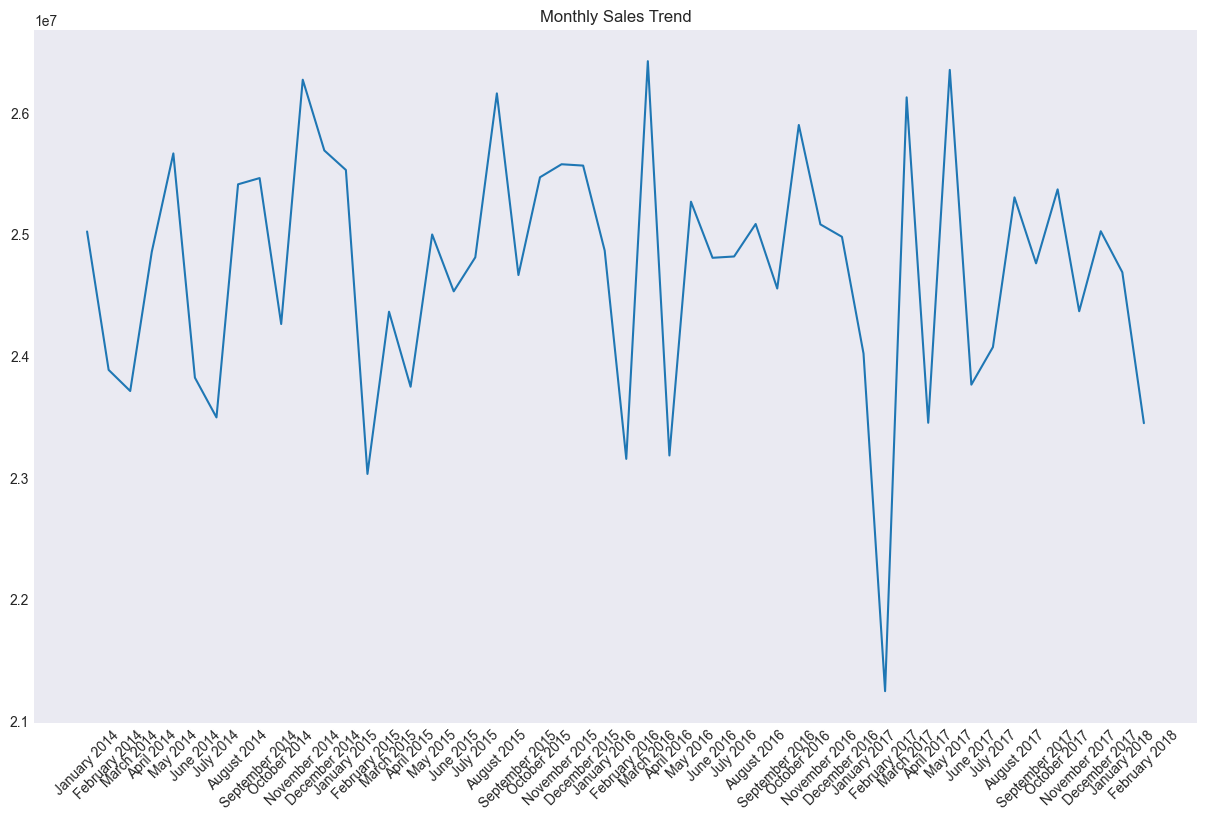

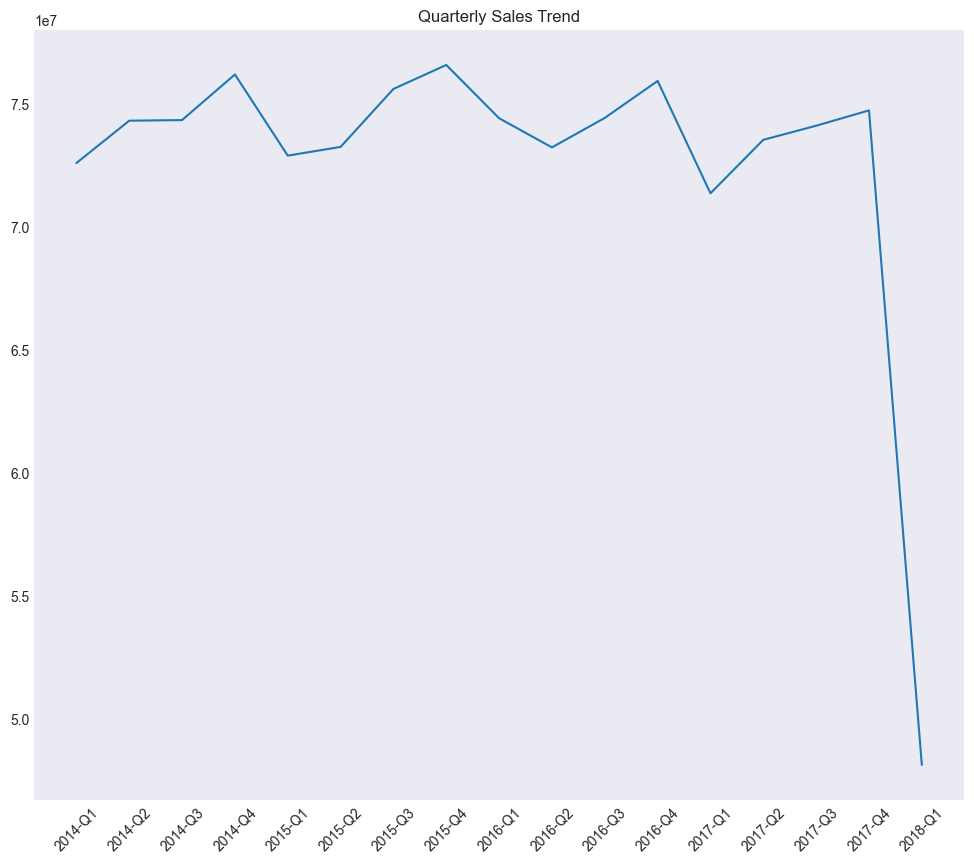

In [44]:


# Monthly trend
plt.figure(figsize=(15, 9))
plt.plot(monthly_sales['month'] + " " + monthly_sales['year'].astype(str), monthly_sales['revenue'])
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend")
plt.show()

# Quarterly trend
plt.figure(figsize=(12, 10))
plt.plot(quarterly_sales['year'].astype(str) + "-Q" + quarterly_sales['quarter'].astype(str), quarterly_sales['revenue'])
plt.xticks(rotation=45)
plt.title("Quarterly Sales Trend")
plt.show()



## Which customers bring the most revenue (top 20), and how often do they purchase?

In [45]:
df.rename(columns={'customer name index':'customer index'},inplace=True)
df.head()

,ordernumber,orderdate,customer index,channel,currency code,warehouse code,region,product index,order quantity,unit price,revenue,total unit cost,profit,growth index,margin index%,month_num,month,quarter,year
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,13170.257,0.878333,36.986301,1,January,1,2014
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,24598.782,0.950909,85.185185,1,January,1,2014
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,5184.460,0.883333,42.857143,1,January,1,2014
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,15339.248,0.937143,127.272727,1,January,1,2014
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,17070.930,0.931250,81.818182,1,January,1,2014


In [50]:
# Total revenue per customer
customer_revenue = df.groupby('customer index')['revenue'].sum().reset_index()

# Sort and pick top 20
top_customers = customer_revenue.sort_values(by='revenue', ascending=False).head(20)
top_customers

,customer index,revenue
99,100,12641251.8
44,45,12220639.2
40,41,10986459.0
105,106,10955826.6
79,80,10753299.0
108,109,10701963.6
52,53,10635633.6
41,42,10107003.6
30,31,10007669.4
72,73,9942223.8


In [51]:
# Count number of purchases per customer
customer_frequency = df.groupby('customer index')['orderdate'].count().reset_index()
customer_frequency.rename(columns={'orderdate': 'Purchase_Count'}, inplace=True)
customer_frequency

,customer index,Purchase_Count
0,1,342
1,2,366
2,3,330
3,4,468
4,5,384
...,...,...
170,171,330
171,172,252
172,173,390
173,174,324


In [53]:
# Merge revenue and purchase frequency
customer_analysis = pd.merge(top_customers, customer_frequency, on='customer index')

# Sort by Revenue again for top 20
customer_analysis = customer_analysis.sort_values(by='revenue', ascending=False)
customer_analysis

,customer index,revenue,Purchase_Count
0,100,12641251.8,516
1,45,12220639.2,474
2,41,10986459.0,474
3,106,10955826.6,462
4,80,10753299.0,528
5,109,10701963.6,486
6,53,10635633.6,540
7,42,10107003.6,390
8,31,10007669.4,432
9,73,9942223.8,402


### lets visualize each


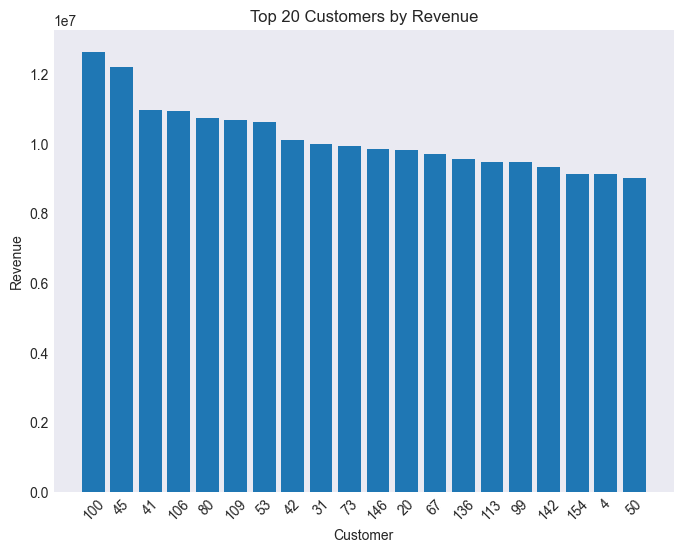

In [55]:
# total customer revenue

plt.figure(figsize=(8,6))
plt.bar(customer_analysis['customer index'].astype(str), customer_analysis['revenue'])
plt.xticks(rotation=45)
plt.title("Top 20 Customers by Revenue")
plt.xlabel("Customer")
plt.ylabel("Revenue")
plt.show()


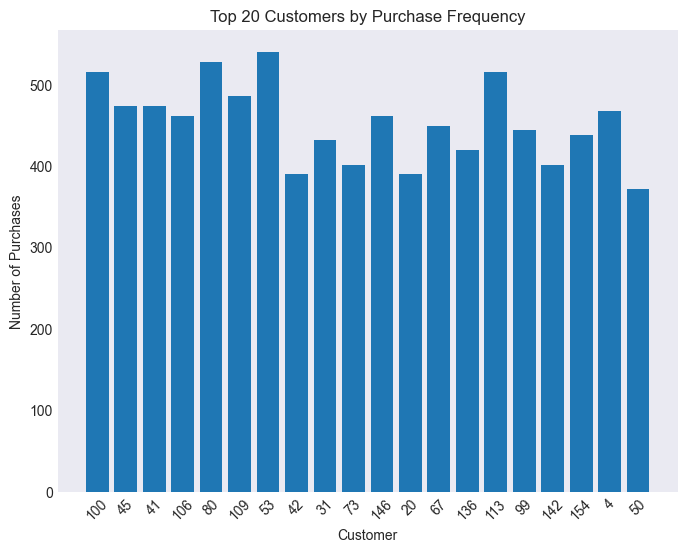

In [57]:
# Purchase frequency distribution
plt.figure(figsize=(8,6))
plt.bar(customer_analysis['customer index'].astype(str), customer_analysis['Purchase_Count'])
plt.xticks(rotation=45)
plt.title("Top 20 Customers by Purchase Frequency")
plt.xlabel("Customer")
plt.ylabel("Number of Purchases")
plt.show()


## Which products have high sales but low profit margins?

In [59]:
# first lets define our profit_margin

df['profit_margin'] = df['profit'] / df['revenue']
df.head()

,ordernumber,orderdate,customer index,channel,currency code,warehouse code,region,product index,order quantity,unit price,revenue,total unit cost,profit,growth index,margin index%,month_num,month,quarter,year,profit_margin
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,13170.257,0.878333,36.986301,1,January,1,2014,0.878333
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,24598.782,0.950909,85.185185,1,January,1,2014,0.950909
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,5184.460,0.883333,42.857143,1,January,1,2014,0.883333
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,15339.248,0.937143,127.272727,1,January,1,2014,0.937143
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,17070.930,0.931250,81.818182,1,January,1,2014,0.931250


#### highest sales and low profit margin means it has a large revenue but the profit is relatively low

We need a rule (thresholds). 
Example:

    High sales = above average revenue
    
    Low margin = below average margin

In [60]:
product_analysis = df.groupby('product index').agg({
    'revenue': 'sum',
    'profit': 'sum'
}).reset_index()

# Calculate profit margin
product_analysis['Profit_Margin'] = product_analysis['profit'] / product_analysis['revenue']


In [62]:
avg_revenue = product_analysis['revenue'].mean()
avg_margin = product_analysis['Profit_Margin'].mean()

high_sales_low_margin = product_analysis[
    (product_analysis['revenue'] > avg_revenue) &
    (product_analysis['Profit_Margin'] < avg_margin)
]
high_sales_low_margin 

,product index,revenue,profit,Profit_Margin
1,2,57401097.6,5.302240e+07,0.923718
2,3,51764816.4,4.785730e+07,0.924514
3,4,56701537.2,5.243962e+07,0.924836
13,14,75390396.6,6.964917e+07,0.923847
14,15,67331623.2,6.230307e+07,0.925317
24,25,109473966.6,1.012976e+08,0.925312


### lets visualize it

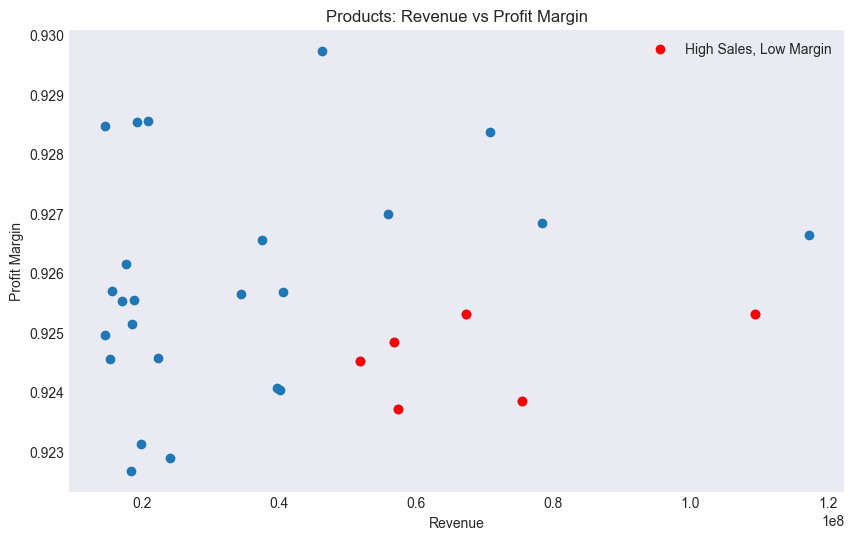

In [63]:

plt.figure(figsize=(10,6))
plt.scatter(product_analysis['revenue'], product_analysis['Profit_Margin'])
plt.title("Products: Revenue vs Profit Margin")
plt.xlabel("Revenue")
plt.ylabel("Profit Margin")

# Highlight low-margin, high-sales products
plt.scatter(high_sales_low_margin['revenue'], high_sales_low_margin['Profit_Margin'], color='red', label='High Sales, Low Margin')
plt.legend()
plt.show()


## Are there any seasonal sales patterns (e.g., sales peaks in certain months)?

In [66]:
monthly_pattern = df.groupby(['year','month_num','month'])['revenue'].sum().reset_index()
monthly_pattern = monthly_pattern.sort_values(['year','month_num'])
monthly_pattern

,year,month_num,month,revenue
0,2014,1,January,25020272.3
1,2014,2,February,23882719.5
2,2014,3,March,23709035.4
3,2014,4,April,24853382.0
4,2014,5,May,25662165.8
5,2014,6,June,23818794.8
6,2014,7,July,23491988.9
7,2014,8,August,25408229.1
8,2014,9,September,25459497.5
9,2014,10,October,24259835.7


In [67]:
#This lets you see seasonal trends regardless of year
seasonal_pattern = df.groupby('month_num')['revenue'].mean().reset_index()
seasonal_pattern['month'] = seasonal_pattern['month_num'].apply(lambda x: pd.to_datetime(str(x), format='%m').strftime('%B'))
seasonal_pattern

,month_num,revenue,month
0,1,19099.938904,January
1,2,19311.301077,February
2,3,19274.645996,March
3,4,19156.056126,April
4,5,19395.432676,May
5,6,19202.039370,June
6,7,18819.752479,July
7,8,19692.297817,August
8,9,19269.825853,September
9,10,19232.312360,October


In [71]:
seasonal_pattern1 = df.groupby('month_num')['revenue'].mean().reset_index().sort_values(by='revenue',ascending=False).head(1)
seasonal_pattern1



,month_num,revenue
10,11,19693.797356


#### Based on this without regarding the year the revenue gets to its maximum at november

#### lets visualize

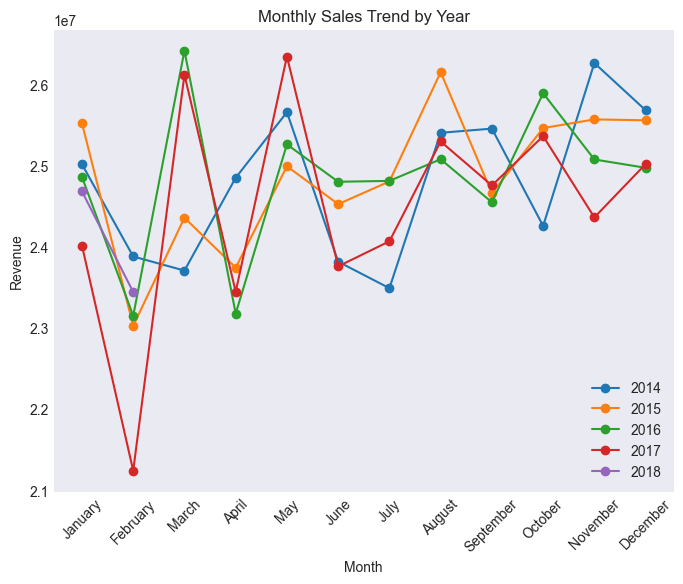

In [73]:
# Yearly Month-to-Month Trend

plt.figure(figsize=(8,6))
for year in monthly_pattern['year'].unique():
    data = monthly_pattern[monthly_pattern['year']==year]
    plt.plot(data['month'], data['revenue'], marker='o', label=str(year))

plt.xticks(rotation=45)
plt.title("Monthly Sales Trend by Year")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.legend()
plt.show()


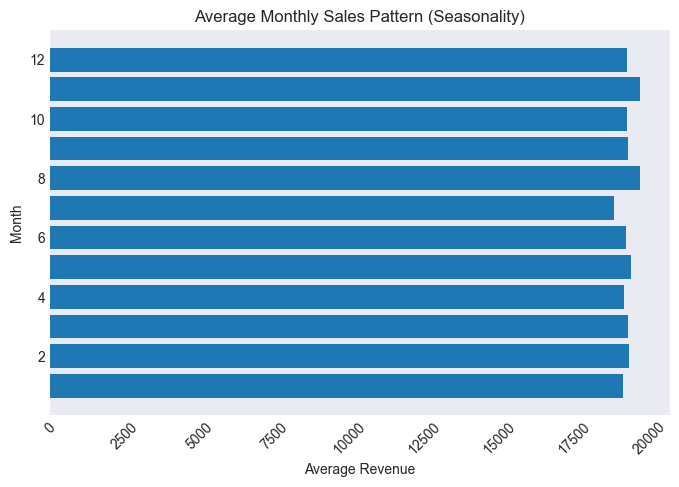

In [79]:
# Average Seasonal Pattern
plt.figure(figsize=(8,5))
plt.barh(seasonal_pattern['month_num'], seasonal_pattern['revenue'])
plt.xticks(rotation=45)
plt.title("Average Monthly Sales Pattern (Seasonality)")
plt.xlabel("Average Revenue")
plt.ylabel("Month")
plt.show()


## Which regions are growing fastest year-over-year in terms of revenue?

In [81]:
region_revenue = df.groupby(['region','year'])['revenue'].sum().reset_index()
region_revenue 

,region,year,revenue
0,1,2014,344326.4
1,1,2015,295282.4
2,1,2016,449871.5
3,1,2017,271926.2
4,1,2018,23215.5
...,...,...,...
4873,994,2014,267906.2
4874,994,2015,145872.4
4875,994,2016,298632.4
4876,994,2017,242345.7


In [84]:
# We compare each region’s revenue to the previous year
region_revenue['YoY_Growth'] = region_revenue.groupby('region')['revenue'].pct_change() * 100
region_revenue

,region,year,revenue,YoY_Growth
0,1,2014,344326.4,NaN
1,1,2015,295282.4,-14.243462
2,1,2016,449871.5,52.352968
3,1,2017,271926.2,-39.554695
4,1,2018,23215.5,-91.462573
...,...,...,...,...
4873,994,2014,267906.2,NaN
4874,994,2015,145872.4,-45.550943
4875,994,2016,298632.4,104.721661
4876,994,2017,242345.7,-18.848156


In [85]:
fastest_growth = region_revenue.sort_values(by='YoY_Growth', ascending=False).dropna()
fastest_growth

,region,year,revenue,YoY_Growth
4301,877,2015,203854.2,273.646076
3431,700,2016,356507.0,261.382776
3111,635,2017,470742.0,253.402746
678,138,2016,391065.6,251.974914
3741,763,2016,353157.0,251.329734
...,...,...,...,...
2362,482,2018,1239.5,-99.420716
466,95,2018,1608.0,-99.464752
2376,485,2018,1527.6,-99.528292
871,177,2018,1105.5,-99.724279


#### Lets Visualize

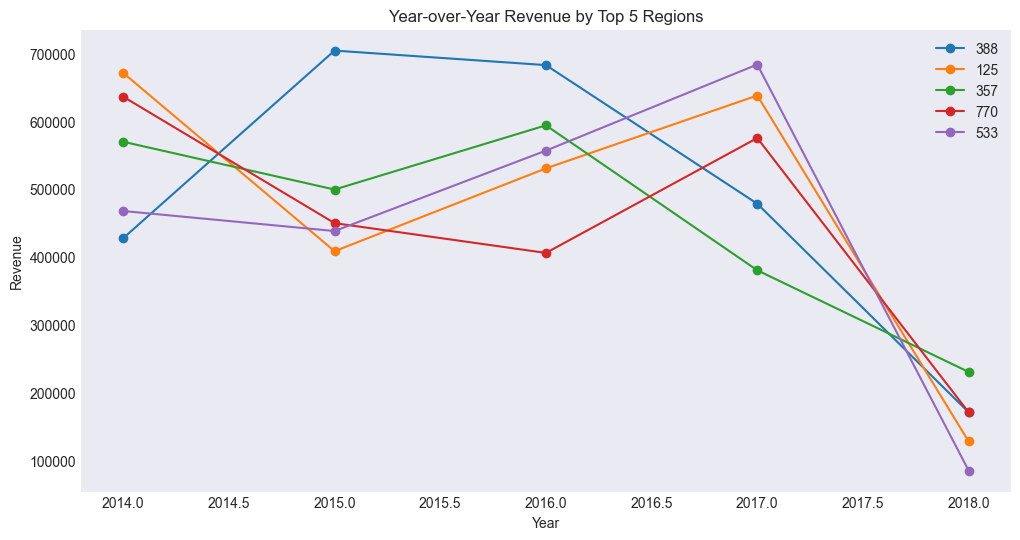

In [87]:

# Find top 5 regions by total revenue
top_regions = region_revenue.groupby('region')['revenue'].sum().nlargest(5).index

plt.figure(figsize=(12,6))
for region in top_regions:
    data = region_revenue[region_revenue['region']==region]
    plt.plot(data['year'], data['revenue'], marker='o', label=region)

plt.title("Year-over-Year Revenue by Top 5 Regions")
plt.xlabel("Year")
plt.ylabel("Revenue")
plt.legend()
plt.show()



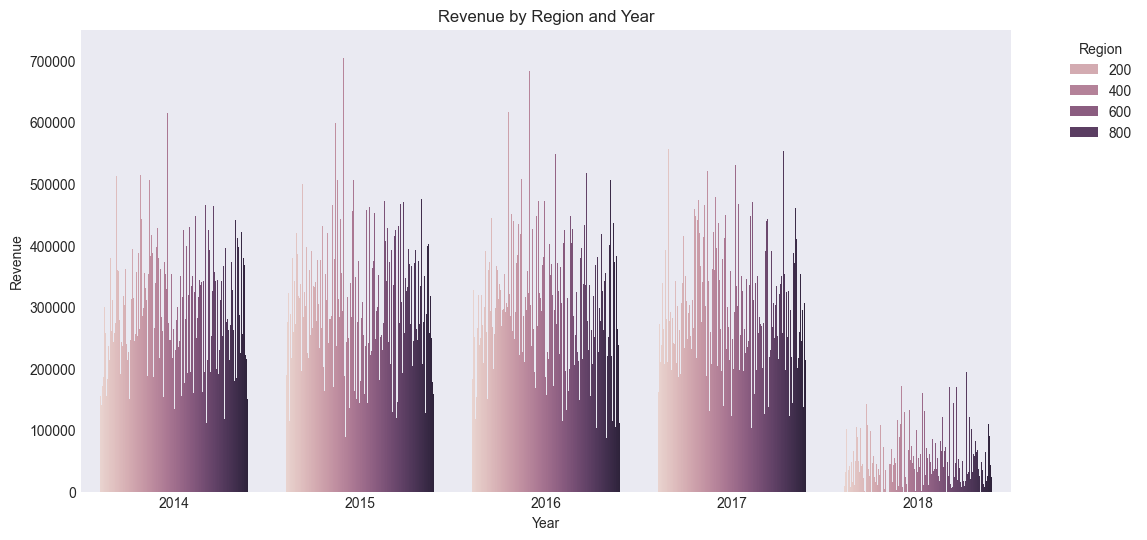

In [88]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(data=region_revenue, x='year', y='revenue', hue='region')
plt.title("Revenue by Region and Year")
plt.xlabel("Year")
plt.ylabel("Revenue")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [6]:
# 📂 2. LOAD DATA



# Path to your Excel workbook
file_path = r"C:\Users\BAB AL SAFA\Downloads\Sales-Analysis-main\Sales-Analysis-main\Sales_data(EDA Exported).csv"

# Read all sheets at once
sheets = pd.read_csv(file_path)

# Assign to named DataFrames
df_sales       = sheets['Sales Orders']
df_customers   = sheets['Customers']
df_products    = sheets['Products']
df_regions     = sheets['Regions']
df_state_reg   = sheets['State Regions']
df_budgets     = sheets['2017 Budgets']

KeyError: 'Sales Orders'

In [ ]:
# The first row of df_state_reg contains the real column names.
new_header        = df_state_reg.iloc[0]      # grab the first row
df_state_reg.columns = new_header             # set columns
df_state_reg       = df_state_reg[1:].reset_index(drop=True)  # drop header row and reset